In [1]:
# Start writing code here...# Step1: Import required packages

from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [2]:
# Step2: Load dataset
train_data = pd.read_csv('heart.csv')
train_data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
# Finds the NaN values
train_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# Feature selection, importance value of each column is the output
from sklearn.ensemble import ExtraTreesClassifier
# load data

array = train_data.values
X = array[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
Y = array[:,1]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10, random_state = 0)
model.fit(X, Y.ravel())
print(model.feature_importances_)

[0.01063008 0.85432364 0.00624664 0.01215142 0.01530826 0.00676875
 0.00808997 0.01612391 0.00729495 0.01089555 0.00681271 0.00643368
 0.03892044]


In [5]:
#Separating features
x = train_data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]]
x


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [6]:
#Seperating label which is "target"
y = train_data.iloc[:, 13:14]
y

target
0         1
1         1
2         1
3         1
4         1
..      ...
298       0
299       0
300       0
301       0
302       0

[303 rows x 1 columns]

In [7]:
# Scale the data to be between -1 and 1, standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [8]:
# Splitting the data into test data and train data
x_tr, x_ts, y_tr, y_ts = train_test_split(x,y,test_size=0.25, random_state=1)

In [9]:
# Step 4: Classifier training using Support Vector Machine 
model = SVC(kernel='rbf', random_state = 0)
model.fit(x_tr,y_tr.values.ravel())

# Step 5: Check classifier accuracy on test data and see result 
predict_survival = model.predict(x_ts)
print("Accuracy: " + str(accuracy_score(y_ts, predict_survival) * 100) + '%')

Accuracy: 80.26315789473685%


Text(87.0, 0.5, 'Truth')

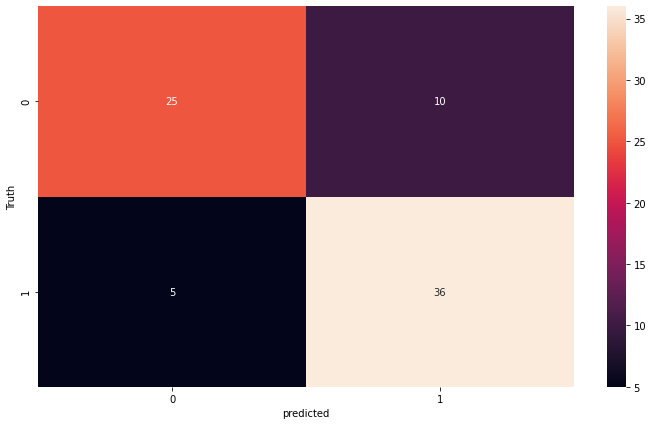

In [10]:
from sklearn.metrics import confusion_matrix
cmtree=confusion_matrix(y_ts, predict_survival)
cmtree

plt.figure(figsize=(12,7))
sns.heatmap(cmtree, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [11]:
# classifier training with randomforest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state = 0)
clf.fit(x_tr,y_tr.values.ravel())
predict_survival1 = clf.predict(x_ts)
print("Accuracy: " + str(accuracy_score(y_ts, predict_survival1) * 100) + '%')

Accuracy: 72.36842105263158%


In [12]:
#classifier training for decision tree
from sklearn import tree
tree=tree.DecisionTreeClassifier()
tree.fit(x_tr, y_tr)
predict_survival2 = tree.predict(x_ts)
print("Accuracy: " + str(accuracy_score(y_ts, predict_survival2) * 100) + '%')

Accuracy: 68.42105263157895%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e57ea7b8-43c2-4c1e-8df0-26d5bd38b98b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>